In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
genshin_data = 'genshin bannerr.csv'
print(genshin_data)

df = pd.read_csv(genshin_data)
df.head

genshin bannerr.csv


<bound method NDFrame.head of     version                            version_name  start_date    end_date  \
0       1.0                       Welcome to Tevyat  2020-09-25  2020-10-19   
1       1.0                       Welcome to Tevyat  2020-10-20  2020-11-10   
2       1.1                   A New Star Approaches  2020-11-11  2020-11-30   
3       1.1                   A New Star Approaches  2020-12-01  2020-12-22   
4       1.2         The Chalk Prince and the Dragon  2020-12-23  2021-01-12   
5       1.2         The Chalk Prince and the Dragon  2021-01-13  2021-02-02   
6       1.3                       All That Glitters  2021-02-03  2021-02-17   
7       1.3                       All That Glitters  2021-02-18  2021-03-02   
8       1.3                       All That Glitters  2021-03-03  2021-03-16   
9       1.4                 Invitation to Windblume  2021-03-17  2021-04-06   
10      1.4                 Invitation to Windblume  2021-04-07  2021-04-27   
11      1.5           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   version            38 non-null     float64
 1   version_name       38 non-null     object 
 2   start_date         38 non-null     object 
 3   end_date           38 non-null     object 
 4   5_star_characters  38 non-null     object 
 5   rerun              38 non-null     object 
 6   mixed              38 non-null     object 
 7   revenue            38 non-null     int64  
 8   banner_days        38 non-null     int64  
 9   avg_revenue        38 non-null     float64
dtypes: float64(2), int64(2), object(6)
memory usage: 3.1+ KB


In [4]:
convert_dict = {'version': str}
 
df = df.astype(convert_dict)
print(df.dtypes)

version               object
version_name          object
start_date            object
end_date              object
5_star_characters     object
rerun                 object
mixed                 object
revenue                int64
banner_days            int64
avg_revenue          float64
dtype: object


In [5]:
print(df['version'])

0     1.0
1     1.0
2     1.1
3     1.1
4     1.2
5     1.2
6     1.3
7     1.3
8     1.3
9     1.4
10    1.4
11    1.5
12    1.5
13    1.6
14    1.6
15    2.0
16    2.0
17    2.1
18    2.1
19    2.2
20    2.2
21    2.3
22    2.3
23    2.4
24    2.4
25    2.5
26    2.5
27    2.6
28    2.6
29    2.7
30    2.7
31    2.8
32    2.8
33    3.0
34    3.0
35    3.1
36    3.1
37    3.2
Name: version, dtype: object


In [6]:
#Hilangin Rerun
df_nr = df[df['rerun'] == 'N']

df_nr.head()

,version,version_name,start_date,end_date,5_star_characters,rerun,mixed,revenue,banner_days,avg_revenue
0,1.0,Welcome to Tevyat,2020-09-25,2020-10-19,Venti,N,N,30632752,25,1225310.08
1,1.0,Welcome to Tevyat,2020-10-20,2020-11-10,Klee,N,N,22750080,22,1034094.55
2,1.1,A New Star Approaches,2020-11-11,2020-11-30,Tartaglia,N,N,13443619,20,672180.95
3,1.1,A New Star Approaches,2020-12-01,2020-12-22,Zhongli,N,N,16264892,22,739313.27
4,1.2,The Chalk Prince and the Dragon,2020-12-23,2021-01-12,Albedo,N,N,11816107,21,562671.76


In [7]:
#Tambah biar no rerun + nunjukkin yang versi 2 keatas
df_nr = df_nr[df_nr['version'].str.startswith('2.', na=True)]

print(df_nr)

   version                            version_name  start_date    end_date  \
15     2.0  Immovable God and the Eternal Euthymia  2021-07-21  2021-08-10   
16     2.0  Immovable God and the Eternal Euthymia  2021-08-11  2021-08-31   
17     2.1      Floating World Under the Moonlight  2021-09-01  2021-09-20   
18     2.1      Floating World Under the Moonlight  2021-09-21  2021-10-12   
22     2.3               Shadows Amidst Snowstorms  2021-12-14  2022-01-04   
25     2.5                   When the Sakura Bloom  2022-02-16  2022-03-08   

     5_star_characters rerun mixed   revenue  banner_days  avg_revenue  
15      Kamisato Ayaka     N     N  16451006           21    783381.24  
16             Yoimiya     N     N   8615144           21    410244.95  
17       Raiden Shogun     N     N  33020905           20   1651045.25  
18  Sangonomiya Kokomi     N     N   7020975           22    319135.23  
22        Arataki Itto     N     N  13404072           22    609276.00  
25            Y

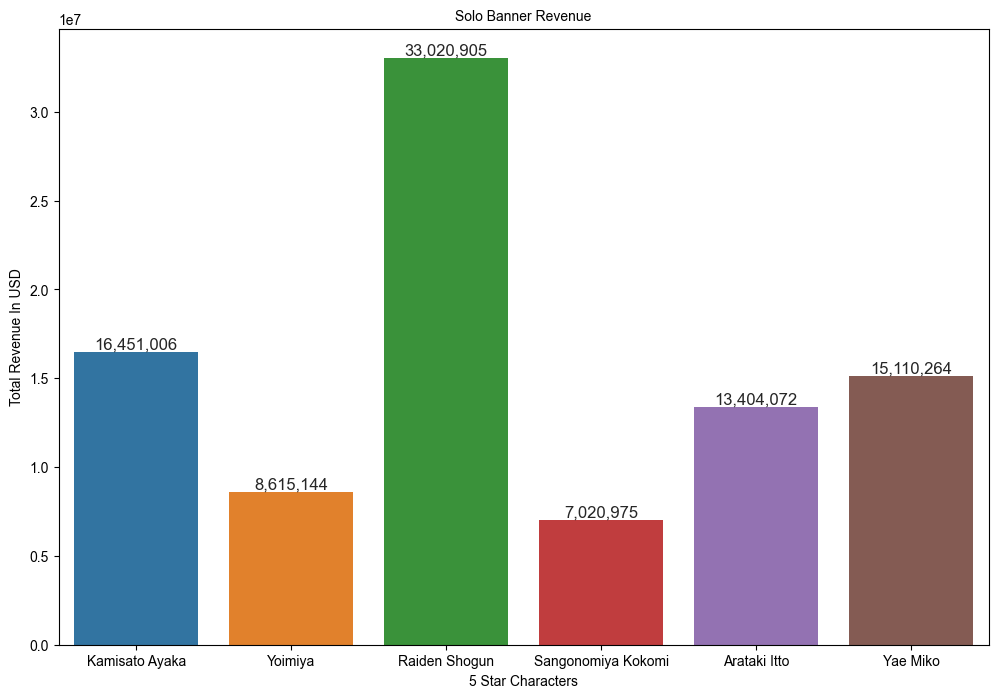

In [8]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["axes.labelsize"] = 40

ax = sns.barplot(x='5_star_characters', y='revenue',
                 data=df_nr,
                 errwidth=5)
sns.set(font_scale = 1)
plt.title('Solo Banner Revenue',fontdict={'size' : 10})
plt.xlabel('5 Star Characters', fontdict={'size' : 10})
plt.ylabel('Total Revenue In USD', fontdict={'size' : 10})
ax.bar_label(ax.containers[0], labels=[f'{x.get_height():,.0f}' for x in ax.containers[0]])
plt.show()